# K- means :

**

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

In [3]:
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [53]:
numrows=25549
weather=pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[True]*numrows,
                            })

seq = ['yesterday','today','tomorrow']

weather=weather.reindex(columns=seq)

for z in range(numrows):
    i = z + 2
    yesterday = data.iloc[(i-2),1]
    today = data.iloc[(i-1),1]
    tomorrow = data.iloc[i,1]
   
    
    weather.iat[z,0] = yesterday
    weather.iat[z,1] = today
    weather.iat[z,2] = tomorrow 

In [54]:
import numpy as np
weather=weather[~weather.isin([np.nan, np.inf, -np.inf]).any(1)] 

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(weather)
kmeans.cluster_centers_.shape

(10, 3)

In [ ]:
plt.scatter(weather['today'], weather['tomorrow'], c=clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

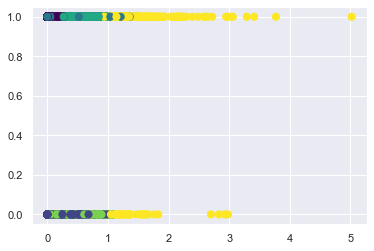

In [57]:
labels = KMeans(6, random_state=0).fit_predict(weather)
plt.scatter(weather['today'], weather['tomorrow'], c=labels,
            s=50, cmap='viridis');

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(weather.tomorrow, labels)

0.9980425931725649

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
proj = tsne.fit_transform(weather)


kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(proj)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(weather.tomorrow[mask])[0]


accuracy_score(weather.tomorrow, labels)

0.9067099906044472